<a href="https://colab.research.google.com/github/doukhanov/dany1398/blob/main/danys_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import qutip
import numpy as np
import scipy
import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
from qutip import *
import warnings
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')
plt.style.use(['science','notebook','grid'])
def states_to_df(states,times):
    psi_plus = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the |+> state
    psi_minus = np.zeros(len(times),dtype="complex128") # To store the amplitude of the |-> state

    for i, state in enumerate(states):
        psi_plus[i] = state[0][0][0]
        psi_minus[i] = state[1][0][0]

    return pd.DataFrame(data={"1":psi_plus, "0":psi_minus}, index=times)


def change_basis_to_df(states, times, new_basis, new_basis_labels):
    psi_new_basis_0 = np.zeros(len(times),dtype="complex128")  # To store the amplitude of the new_basis_0 state
    psi_new_basis_1 = np.zeros(len(times),dtype="complex128") # To store the amplitude of the new_basis_1 state

    for i, state in enumerate(states):
        transformed_state = state.transform(new_basis)
        psi_new_basis_0[i] = transformed_state[0][0][0]
        psi_new_basis_1[i] = transformed_state[1][0][0]

    return pd.DataFrame(data={new_basis_labels[0]:psi_new_basis_0, new_basis_labels[1]:psi_new_basis_1}, index=times)
import warnings
warnings.filterwarnings('ignore')

$$
\Huge \text{Modeling a Two-Level System}
$$


Let's start by considering a two-level system interacting with an electromagnetic field. The total Hamiltonian of the system can be written as:

$$ H = H_s + W $$

Here, $ H_s $ represents the Hamiltonian of the two-level system, and $ W $ represents the light-matter interaction term.

The Hamiltonian of the two-level system is given by:

$$ H_s \, | \phi_n \rangle = E_n \, | \phi_n \rangle $$

Light-Matter Interaction \( \hat{W} \) is expressed as:

$$ W = - \hat{d} \cdot \mathbb{E}(t) $$

where $\hat{d}$  is the electric dipole moment operator, and $\mathbb{E}(t)$ is the time-dependent electric field. The electric dipole moment operator can be written in several forms:

$$ \hat{d} = -e \hat{r} = -e \sum_{i,j} |g\rangle\langle g|\hat{r}|e\rangle\langle e| + \text{h.c.} $$

$$\text{or}$$

$$ \hat{d} = |d_{\text{ge}}| (|g\rangle\langle e| + |e\rangle\langle g|)  = |d_{ge}| \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} $$

where $|g\rangle $ and $|e\rangle$ are the ground and excited states, respectively, and $|d_{\text{ge}}|$ is the coupling between these states.

Electric Field:

The electric field is assumed to be a monochromatic plane wave with frequency $\omega_L $ and amplitude $E_0$, and $\epsilon $ is the polarization,and q the charge:

$$ \mathbb{E}(t) = q \epsilon E_0 \cos(\omega_L t) $$

Basis States:

We define the states $|1\rangle $ and $|0\rangle$ , representing the ground and excited states, respectively:

$$ |1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |0\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

### Hamiltonian Matrix without Spontaneous Emission:

Combining the two-level system Hamiltonian and the light-matter interaction, we can express the total Hamiltonian in matrix form:

$$ H = \begin{bmatrix} E_n + \delta & 0 \\ 0 & E_n - \delta \end{bmatrix} + \begin{bmatrix} 0 & - \hat{d} \cdot \mathbb{E}(t) \\ - \hat{d} \cdot \mathbb{E}(t) & 0 \end{bmatrix} =  E_n I - \hat{d} \cdot \mathbb{E}(t) \sigma_x + \delta \sigma_z $$

Here, $E_0 $ is the energy, $\delta $ is the energy difference between the ground and excited states, and $d_{ge}$ is the coupling strength between the two-level system and the light-matter interaction. We have also set $\hbar=c=1$ for simplicity.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
$$\Large \text{two-level system without perturbation}$$
 $$\text{
In this scenario, the time evolution of the system is governed by the Schrödinger equation:}$$

$$ i \hbar \frac{d}{dt}\psi(t) = \hat{H_s}\psi(t) $$





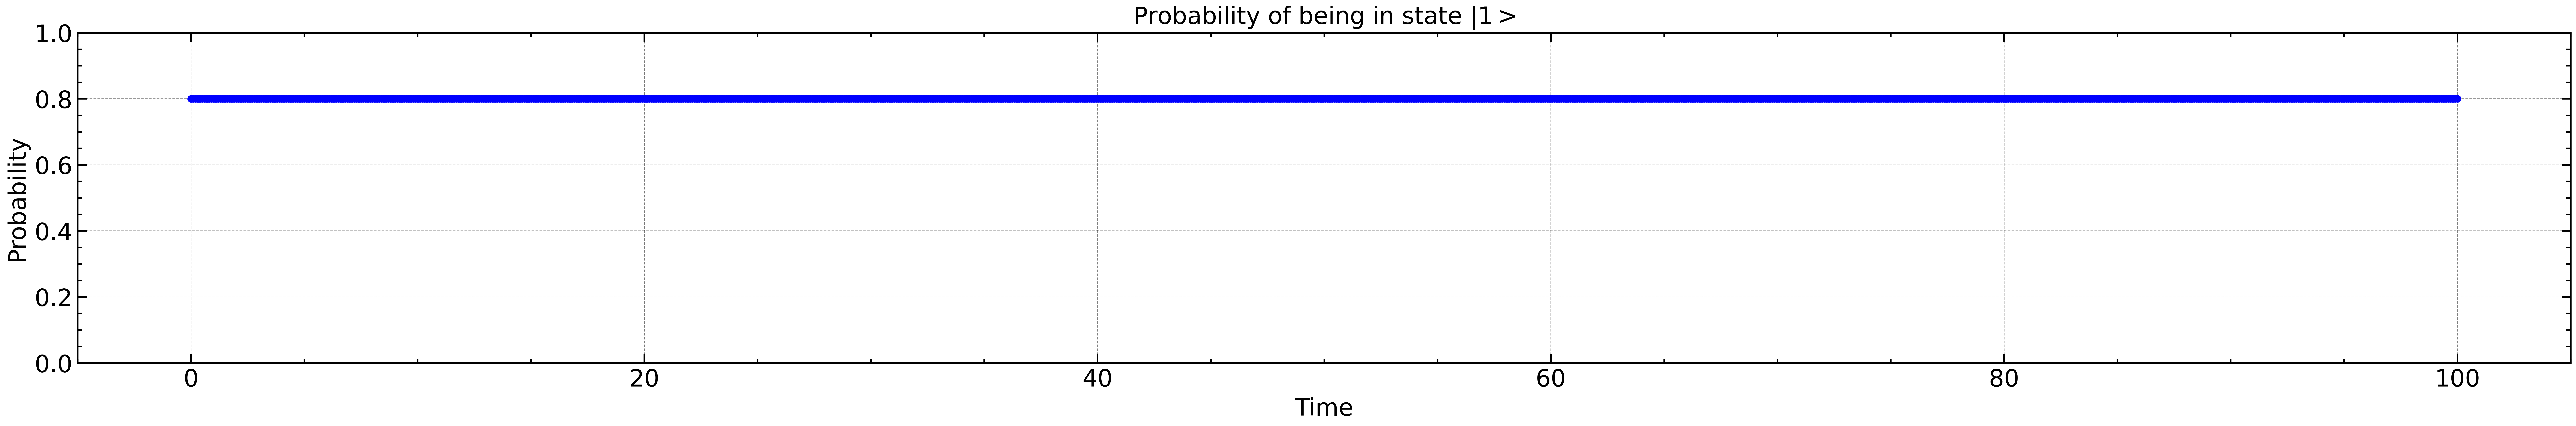

In [ ]:

En = 10
delta = 1
tlist = np.linspace(0, 100, 1000)

plus = basis(2, 0)   # |+> state (|1>)
minus = basis(2, 1)  # |-> state (|0>)
psi0 = (2*plus +minus ).unit()  #---------------------------### play with Initial state ###
H0 = En * qeye(2) + delta * sigmaz()  # Hamiltonian for the system without interaction

# Calculate the time evolution
result = mesolve(H0, psi0, tlist)

# Convert the states to a DataFrame
data = {"|psi|^2": [np.abs(state[0][0])**2 for state in result.states]}
df = pd.DataFrame(data, index=tlist)

# Plot the result
plt.figure(figsize=(30, 4),dpi = 600)
plt.plot(df.index, df["|psi|^2"], color='b', marker='o', markersize=4)
plt.title("Probability of being in state $|1>$")
plt.xlabel("Time")
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for clarity
plt.ylabel("Probability")
plt.show()


# Two-level system without light

First, let's look at a two-level system without light:

$$
\begin{align*}
\psi &= c_1 |1\rangle + c_2 |2\rangle \\
\psi(t) &= c_1 e^{-i\omega_1 t} |1\rangle + c_2 e^{-i\omega_2 t} |2\rangle
\end{align*}
$$

$$\Delta E = \hbar \Delta \omega$$

Now, let's plug in the Schrödinger equation:

$$
i\hbar\partial_t \psi = H\psi
$$

$$
i\hbar \dot{c}_1 e^{-i\omega_1 t} |1\rangle + \hbar\omega_1 c_1 e^{-i\omega_1 t} |1\rangle + i\hbar \dot{c}_2 e^{-i\omega_2 t} |2\rangle + \hbar\omega_2 c_2 e^{-i\omega_2 t} |2\rangle = \hbar\omega_1 c_1 e^{-i\omega_1 t} |1\rangle + \hbar\omega_2 c_2 e^{-i\omega_2 t} |2\rangle
$$

$$
i\hbar \dot{c}_1 e^{-i\omega_1 t} |1\rangle + i\hbar \dot{c}_2 e^{-i\omega_2 t} |2\rangle = 0
$$

$$
\begin{align*}
\begin{cases}
i\hbar \dot{c}_1 e^{-i\omega_1 t} &= 0 \quad \implies \dot{c}_1 = \text{const} \quad (1) \\
i\hbar \dot{c}_2 e^{-i\omega_2 t} &= 0 \quad \implies \dot{c}_2 = \text{const} \quad (2)
\end{cases}
&\implies \text{probabilities are only dependent on the initial states} \quad \psi_0 = c_1 |1\rangle + c_2 |2\rangle \text{ and don't evolve with time}
\end{align*}
$$

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

$$\Large \text{two-level system with perturbation}$$

In general:
$$H = H_0 + W$$

like before we can write:
$$|\psi(t)\rangle = c_1(t)e^{-i\omega_1 t} |1\rangle + c_2(t)e^{-i\omega_2 t} |2\rangle $$

If we plug it into the Schrödinger equation, we will get:

$$
\dot{c}_1(t) = -i \frac{|d_{12}|\cdot E_0}{\hbar } \cdot e^{-i\omega_{21} t} \cos(\omega_L t) c_2(t) \\
\dot{c}_2(t) = -i \frac{|d_{12}|\cdot E_0}{\hbar} \cdot e^{i\omega_{21} t} \cos(\omega_L t) c_1(t)
$$

Let's define the Rabi frequency:
$$\Omega_0 = \frac{|d_{12}| E_0}{\hbar}$$

$$

\dot{c}_1(t) = i \frac{\Omega_0}{2} \left[e^{i(\omega_L-\omega_{21})t} + e^{-i(\omega_L+\omega_{21})t}\right]c_2(t) \sim i \frac{\Omega_0}{2} e^{i\Delta\omega t} c_2(t)
\\
\dot{c}_2(t) = i \frac{\Omega_0}{2} \left[e^{-i(\omega_L-\omega_{21})t} + e^{i(\omega_L+\omega_{21})t}\right]c_1(t) \sim i \frac{\Omega_0}{2} e^{-i\Delta\omega t} c_1(t)
$$
$$
\textbf{Bloch Equations:}
$$

$$
\boxed{
\begin{cases}
\dot{c}_1 = i \frac{\Omega_0}{2} \left[e^{i\Delta\omega t}\right]c_2(t) \\
\dot{c}_2 = i \frac{\Omega_0}{2} \left[e^{-\Delta\omega t}\right]c_1(t)
\end{cases}
}
$$
$$
\textbf{solutions :}
$$
$$
\boxed{c_1(t) = \left[\cos\left(\frac{\Omega_e t}{2}\right) - i\frac{\Omega_0}{\Omega_e}\sin\left(\frac{\Omega_e t}{2}\right)\right]e^{-\frac{i\Delta \omega t}{2}}}\\

\boxed{c_2(t) = i\frac{\Omega_0}{\Omega_e}\sin\left(\frac{\Omega_e t}{2}\right)e^{-\frac{i\Delta \omega t}{2}}}
$$
$$

\Omega_e = \sqrt{(\Omega_0^2 + (\omega_L - \omega_{21})^2)} \quad \text{Effective Rabi frequency}

$$






$$\textbf{In the following code we will use perturbation theory to solve our equation and compare afterwards with what we got here }
$$

Text(0, 0.5, '$|c_2(t)|^2$')

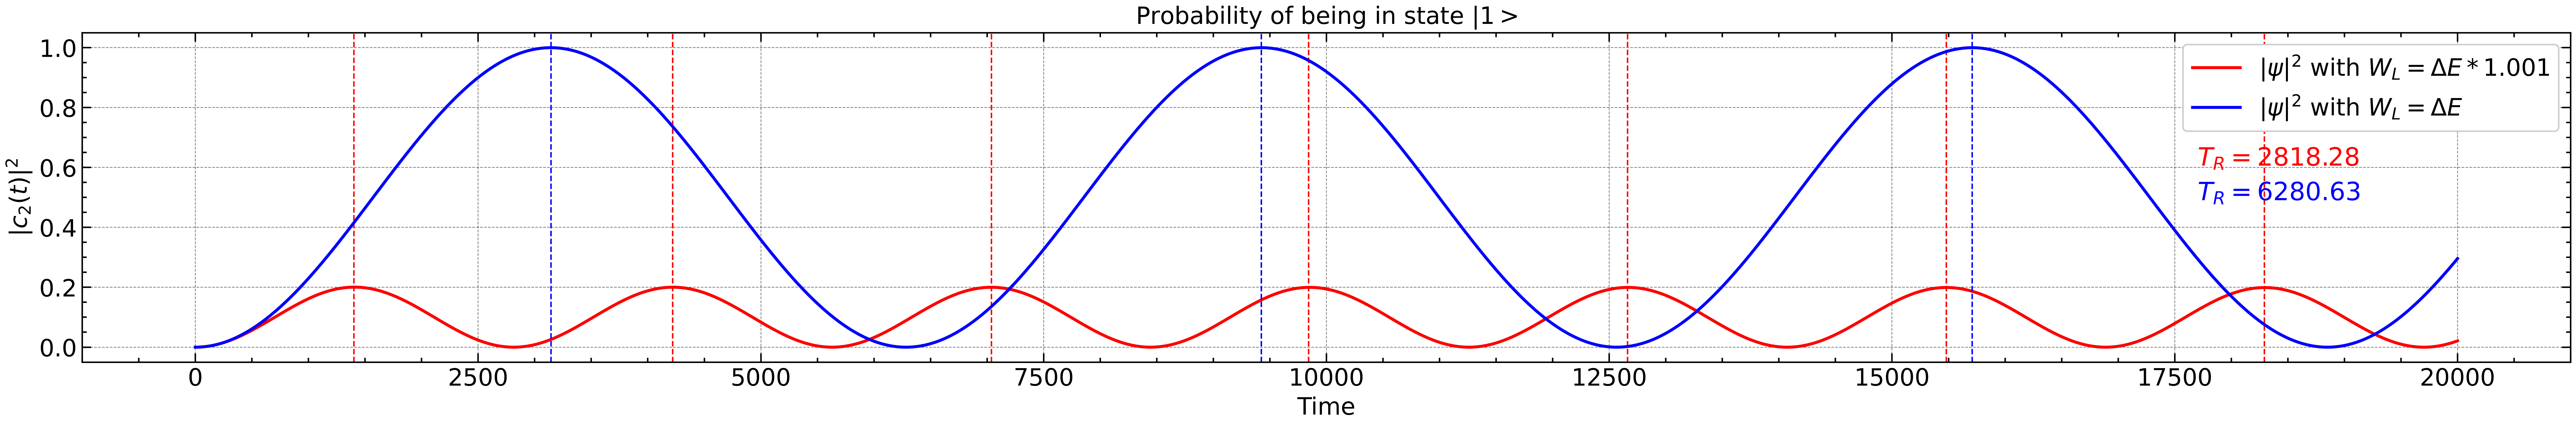

In [ ]:
def plot_with_peaks(x, y, color, label=None, linewidth=1, peak_height=None, peak_distance=None):
    # Find peaks
    if peak_height is None:
        peaks, _ = find_peaks(y, distance=peak_distance)
    else:
        peaks, _ = find_peaks(y, height=peak_height, distance=peak_distance)

    # Plot the data
    plt.plot(x, y, label=label, color=color)

    # Plot vertical lines at peak positions
    for peak in peaks:
        plt.axvline(x=x[peak], color=color, linestyle='--', linewidth=linewidth)

    # Calculate difference between the first two peaks
    if len(peaks) >= 2:
        peak_diff = x[peaks[1]] - x[peaks[0]]

        # Annotate peak difference on the plot
        if color == 'r':
            plt.text(0.85, 0.655, f'$T_R = {peak_diff:.2f}$', fontsize=17, color=color, transform=plt.gca().transAxes, ha='left', va='top')
        else:
            plt.text(0.85, 0.55, f'$T_R = {peak_diff:.2f}$', fontsize=17, color=color, transform=plt.gca().transAxes, ha='left', va='top')

    # Show legend
    plt.legend()

# Given parameters
En = 2
eps = 1
hbar = 1
q = -1
E0 = 1
delta = 1
d = 0.001
tlist = np.linspace(0, 20000, 10000)

# Define operators
plus = basis(2, 0)   # |+> state (|0>)
minus = basis(2, 1)  # |-> state (|1>)
psi0 = (minus).unit()  # Initial state -------------- ### play with Initial state ###

# Define Hamiltonian
H0 = En* qeye(2) + delta * sigmaz()  # Hamiltonian for the system without interaction
W = -d *eps* E0 * sigmax()  # Time-dependent term

# Define time-dependent Hamiltonian
H = [H0, [W, 'cos(wl * t)']]

# Calculate the time evolution
result1 = mesolve(H, psi0, tlist, args={'wl': (2 * delta)*1.001})
result2 = mesolve(H, psi0, tlist, args={'wl': (2 * delta)})

# Convert the states to DataFrames
data1 = {"$|\psi|^2$ with $W_L = (\Delta E0)1.001$": [np.abs(state[0][0])**2 for state in result1.states]}
df1 = pd.DataFrame(data1, index=tlist)
data2 = {"$|\psi|^2$ with $W_L = (\Delta E0)$": [np.abs(state[0][0])**2 for state in result2.states]}
df2 = pd.DataFrame(data2, index=tlist)

# Plot the result with peaks
plt.figure(figsize=(30, 4), dpi=600)
plot_with_peaks(df1.index, df1["$|\psi|^2$ with $W_L = (\Delta E0)1.001$"], 'r', label="$|\psi|^2$ with $W_L = \Delta E * 1.001$", linewidth=1, peak_height=0.19, peak_distance=800)
plot_with_peaks(df2.index, df2["$|\psi|^2$ with $W_L = (\Delta E0)$"], 'b', label="$|\psi|^2$ with $W_L = \Delta E$", linewidth=1, peak_height=0.9 ,peak_distance=2000)
plt.title("Probability of being in state $|1>$")
plt.xlabel("Time")
plt.ylabel(r'$|c_2(t)|^2$')

$$\textbf{ Description:} $$

The figure illustrates the  evolution of the probability amplitude of Particle being in state $|1\rangle$
 denoted by $|c_2(t)|^2 $.
  
(with initial conditions $|\phi_{t=o}\rangle = |0\rangle $)


We can see two distinct scenarios :
 1) with $ \omega_L = [\Delta E    ]$
 2) with $\omega_L =  [\Delta E \times 1.001]$.

We can see Rabi oscillations occur
-    the states $|0\rangle$ and $|1\rangle$  are not stationary states in the presence of the oscillating field. The probability of finding the system in either state oscillates with time, following a sinusoidal behavior: $\sin^2(\Omega t/2)$ as we can see here
-    The amplitude of the oscillation drop significantly, even for a small difference from the resonance frequency

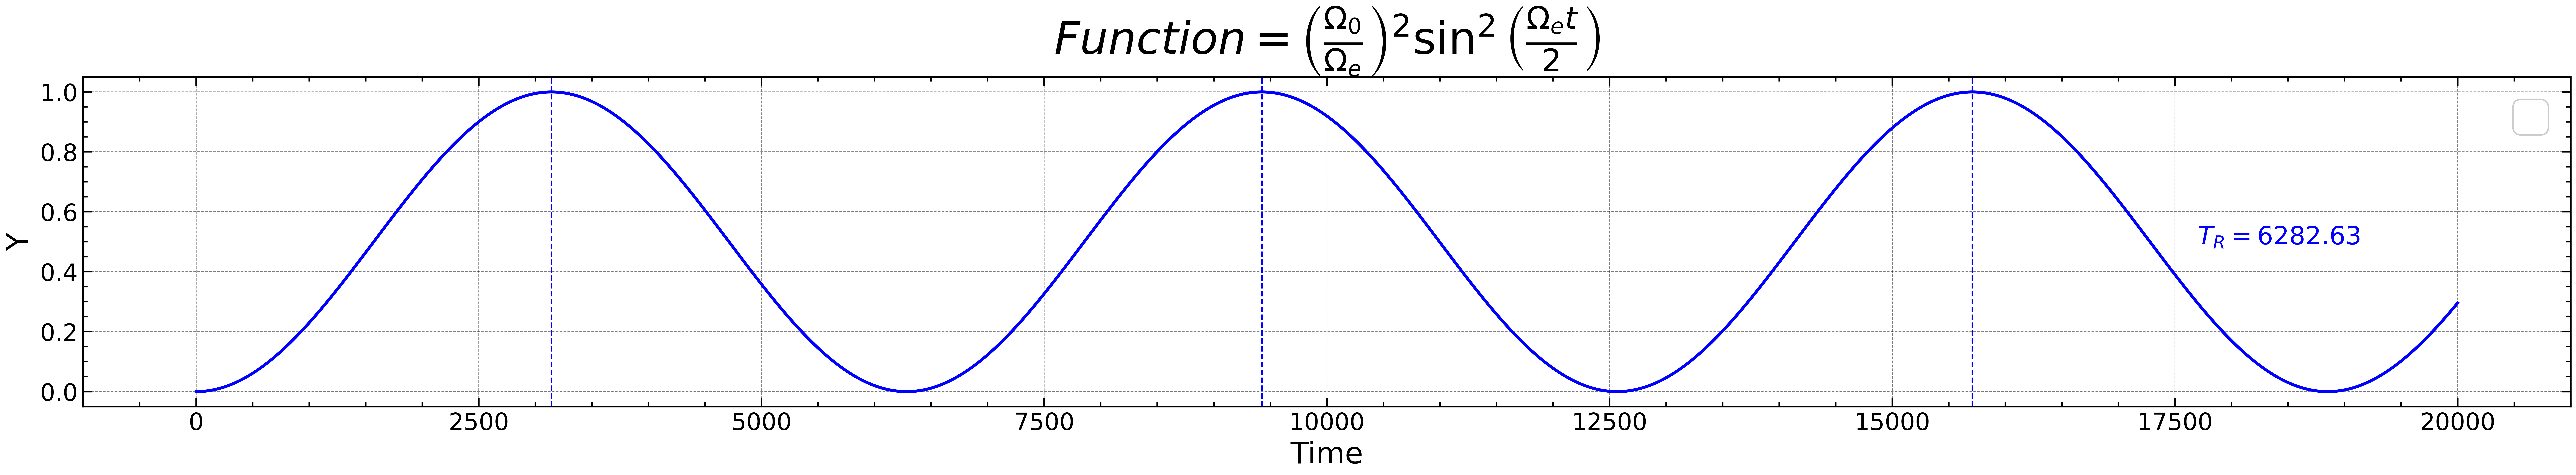

In [ ]:
plt.figure(figsize=(30, 4), dpi=600)

# Define angular frequency
diff = 100  # %
wl = (2 * delta) * diff / 100
Omega_0 = (E0 * d) / hbar
Omega_e = np.sqrt(Omega_0**2 + (wl - 2 * delta)**2)

# Calculate plos
plos = (((Omega_0) / Omega_e)**2) * (np.sin(0.5 * Omega_e * tlist))**2

# Plot plos
plot_with_peaks(tlist, plos, 'b', linewidth=1, peak_height=0.19, peak_distance=800)
plt.xlabel('Time', fontsize=20)  # Increase label font size
plt.ylabel('Y', fontsize=20)  # Increase label font size
plt.legend(fontsize=30, loc=1)  # Increase legend font size
plt.title(r'$Function = \left(\frac{\Omega_0}{\Omega_e}\right)^2 \sin^2\left(\frac{\Omega_e t}{2}\right)$', size=30)  # Decrease title font size and include function
plt.show()




2. The period of Rabi oscillations, $T_R$, is given by:
   $$T_R = \frac{2\pi}{\Omega_e} = \frac{2\pi}{\sqrt{(W_L - 2\delta)^2 + \Omega^2}}$$
   where:
   - $\Omega = \frac{q \cdot E_0}{\hbar} \cdot |d_{ge}|$
   - $\Omega_e$ is the effective Rabi frequency
   - $W_L$ is the laser frequency.
   - $\delta$ is the detuning, which represents the difference between the laser frequency and the atomic transition frequency.
   - $\Omega$ is the Rabi angular frequency, defined below.
   - $|d_{ge}|$ is the magnitude of the dipole transition matrix element between the ground state $|g\rangle$ and the excited state $|e\rangle$.

The Rabi oscillations describe the periodic exchange of population between the two quantum states, driven by the oscillating electromagnetic field. The oscillation period and frequency depend on the system parameters, such as the detuning, the strength of the electromagnetic field, and the dipole transition matrix element.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------




$$
\Large \textbf{Transitioning from the superposition state framework to the density operator framework}
$$



In the context of the given information, I can provide the following interpretation:

1. **Superposition State**:
$$|\psi\rangle = c_1|u_1\rangle + c_2|u_2\rangle$$
This represents a general quantum state as a superposition of two basis states $|u_1\rangle$ and $|u_2\rangle$, with complex coefficients $c_1$ and $c_2$, respectively.

2. **Density Operator**:
$$\hat{\rho} = \sum_i p_i |\psi_i\rangle\langle\psi_i|$$
$$\hat{\rho} = \hat{\rho}^\dagger = \sum_{i,j} |i\rangle\langle j|\langle i|\hat{\rho}|j\rangle$$
The density operator $\hat{\rho}$ is a way to represent mixed quantum states, where $p_i$ is the probability of the system being in the pure state $|\psi_i\rangle$. The second equation shows that the density operator is Hermitian (equal to its own conjugate transpose).

3. **Density Matrix**:
$$\rho = \begin{pmatrix}
\rho_{11} & \rho_{12} \\
\rho_{21} & \rho_{22}
\end{pmatrix} = \begin{pmatrix}
|c_1|^2 & c_1c_2^* \\
c_2c_1^* & |c_2|^2
\end{pmatrix}$$

The density matrix $\rho$ is the representation of the density operator $\hat{\rho}$ in the chosen basis $\{|u_1\rangle, |u_2\rangle\}$. The elements of the matrix can be interpreted as follows:

- $\rho_{11} = |c_1|^2$ is the population or probability of finding the system in the pure state $|u_1\rangle$.
- $\rho_{22} = |c_2|^2$ is the population or probability of finding the system in the pure state $|u_2\rangle$.
- $\rho_{12} = c_1c_2^*$ and $\rho_{21} = c_2c_1^*$ are the coherences or off-diagonal elements, which represent the quantum superposition between the two states $|u_1\rangle$ and $|u_2\rangle$.

In summary, the density matrix formalism provides a way to represent mixed quantum states, where the diagonal elements correspond to the populations of the pure states, and the off-diagonal elements represent the coherences or superpositions between the states.

$$\begin{equation}
i\hbar \frac{\partial\rho}{\partial t} = [H, \rho]
\end{equation}

$$tgfuufytfuytuutuyuygilyfiugiu$$

$$\begin{equation}
\frac{\partial\rho}{\partial t} = -\frac{i}{\hbar}[H, \rho] + \mathcal{L}(\rho)
\end{equation}

In [ ]:
å

NameError: name 'å' is not defined